# LAB6

## Akshay Kekuda

In [2]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.4MB 5.8MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

Below is the list of transactions carried out by customers

|Transcation ID| Customer ID| Items|
|-:|-:|-:|
|t1|c1|A,B,C|
|t2|c1|A,B,C,D|
|t3|c2|A,B,D|
|t4|c2|A,B,D|
|t5|c3|A,C,E|
|t6|c3|D,E,F|
|t7|c4|A,B,D,E|
|t8|c4|A,B,D|
|t9|c5|A,B,C,F|
|t10|c5|A,B,C,D|

### Requirement 1

I use F<sub>k-1</sub> X F<sub>k-1</sub> to generate frequent item sets. We have a minsup of 0.6. So we need a minimum support count of 0.6*10 = 6 to determine if it's frequent or not.

|ItemSets| Support Count | Frequent|
|-:|-:|-:|
|A|9|Yes|
|B|8|Yes|
|C|5|No|
|D|7|Yes|
|E|3|No|
|F|2|No|
|D|7|Yes|
|A,B|8|Yes|
|A,D|6|Yes|
|B,D|6|Yes|
|A,B,D|6|Yes|

### Requirement 2

Here we check the confidence of the below rules with threshhold 0.8

|Candidate Rule| Support Count | Confidence| Interesting
|-:|-:|-:|-:|
|A -> B|8|8/9 = 0.89|Yes
|B -> A|8|8/8 = 1|Yes
|A -> D|6|6/9 = 0.67|No
|D -> A|6|6/7 = 0.86|Yes
|B -> D|6|6/8 = 0.75|No
|D -> B|6|6/7 = 0.86|Yes
|A -> B,D|6|6/9 = 0.67|No
|B -> A,D|6|6/8 = 0.75|No
|D -> A,B|6|6/7 = 0.86|Yes
|A,B -> D|6|6/8 = 0.75|No
|A,D -> B|6|6/6 = 1|Yes
|B,D -> A|6|6/6 = 1|Yes



In [4]:
dataset = [['A', 'B', 'C'],
           ['A', 'B', 'C', 'D'],
           ['A', 'B', 'D'],
           ['A', 'B', 'D'],
           ['A', 'C', 'E'],
           ['D', 'E', 'F'],
           ['A', 'B', 'D', 'E'],
           ['A', 'B', 'D'],
           ['A', 'B', 'C', 'F'],
           ['A', 'B', 'C', 'D']
           ]
dataset

[['A', 'B', 'C'],
 ['A', 'B', 'C', 'D'],
 ['A', 'B', 'D'],
 ['A', 'B', 'D'],
 ['A', 'C', 'E'],
 ['D', 'E', 'F'],
 ['A', 'B', 'D', 'E'],
 ['A', 'B', 'D'],
 ['A', 'B', 'C', 'F'],
 ['A', 'B', 'C', 'D']]

In [5]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,A,B,C,D,E,F
0,True,True,True,False,False,False
1,True,True,True,True,False,False
2,True,True,False,True,False,False
3,True,True,False,True,False,False
4,True,False,True,False,True,False
5,False,False,False,True,True,True
6,True,True,False,True,True,False
7,True,True,False,True,False,False
8,True,True,True,False,False,True
9,True,True,True,True,False,False


In [6]:
minsup = 0.6
frequent_itemsets = fpgrowth(df, min_support=minsup, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.9,(A)
1,0.8,(B)
2,0.7,(D)
3,0.8,"(B, A)"
4,0.6,"(D, B)"
5,0.6,"(D, A)"
6,0.6,"(D, B, A)"


In [7]:
minconf = 0.8
rules = association_rules(frequent_itemsets, min_threshold=minconf, metric= 'confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B),(A),0.8,0.9,0.8,1.000000,1.111111,0.08,inf
1,(A),(B),0.9,0.8,0.8,0.888889,1.111111,0.08,1.8
2,(D),(B),0.7,0.8,0.6,0.857143,1.071429,0.04,1.4
3,(D),(A),0.7,0.9,0.6,0.857143,0.952381,-0.03,0.7
4,"(D, B)",(A),0.6,0.9,0.6,1.000000,1.111111,0.06,inf
5,"(D, A)",(B),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
6,(D),"(B, A)",0.7,0.8,0.6,0.857143,1.071429,0.04,1.4


The above results match the one obtained from hand calculations by confidence

### Requirement 3 

In [8]:
dataset = [['A', 'B', 'C', 'D'],
           ['A', 'B', 'D'],
           ['A', 'C', 'D', 'E', 'F'],
           ['A', 'B', 'D', 'E'],
           ['A', 'B', 'C', 'D', 'F']
           ]
dataset

[['A', 'B', 'C', 'D'],
 ['A', 'B', 'D'],
 ['A', 'C', 'D', 'E', 'F'],
 ['A', 'B', 'D', 'E'],
 ['A', 'B', 'C', 'D', 'F']]

In [9]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,A,B,C,D,E,F
0,True,True,True,True,False,False
1,True,True,False,True,False,False
2,True,False,True,True,True,True
3,True,True,False,True,True,False
4,True,True,True,True,False,True


In [10]:
minsup = 0.8
frequent_itemsets = fpgrowth(df, min_support=minsup, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.0,(D)
1,1.0,(A)
2,0.8,(B)
3,1.0,"(D, A)"
4,0.8,"(D, B)"
5,0.8,"(B, A)"
6,0.8,"(D, B, A)"


In [11]:
minconf = 0.9
rules = association_rules(frequent_itemsets, min_threshold=minconf, metric= 'confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(D),(A),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(A),(D),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(B),(D),0.8,1.0,0.8,1.0,1.0,0.0,inf
3,(B),(A),0.8,1.0,0.8,1.0,1.0,0.0,inf
4,"(D, B)",(A),0.8,1.0,0.8,1.0,1.0,0.0,inf
5,"(B, A)",(D),0.8,1.0,0.8,1.0,1.0,0.0,inf
6,(B),"(D, A)",0.8,1.0,0.8,1.0,1.0,0.0,inf


### Requirement 4

In [12]:
source_df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")

In [13]:
source_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
source_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [15]:
source_df.shape

(541909, 8)

In [16]:
source_df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
PINK ACRYLIC JEWEL SNOWFLAKE             1
SWEETHEART KEY CABINET                   1
label mix up                             1
CAT WITH SUNGLASSES BLANK CARD           1
BAROQUE BUTTERFLY EARRINGS MONTANA       1
Name: Description, Length: 4223, dtype: int64

In [17]:
source_df.StockCode.value_counts()

85123A      2313
22423       2203
85099B      2159
47566       1727
20725       1639
            ... 
37424          1
84482          1
DCGS0068       1
20678          1
84964B         1
Name: StockCode, Length: 4070, dtype: int64

In [18]:
df = source_df.drop(columns=['Quantity', 'UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0,United Kingdom


In [19]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
InvoiceDate         0
CustomerID     135080
Country             0
dtype: int64

In [20]:
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
622,536414,22139,NaN,2010-12-01 11:52:00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,2010-12-01 14:32:00,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2010-12-01 14:32:00,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,2010-12-01 14:32:00,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2010-12-01 14:32:00,NaN,United Kingdom
...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,2011-12-09 10:26:00,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,2011-12-09 10:26:00,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,2011-12-09 10:26:00,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,2011-12-09 10:26:00,NaN,United Kingdom


In [21]:
df.StockCode = df.StockCode.apply(str)
df.InvoiceNo = df.InvoiceNo.apply(str)
df.CustomerID = df.CustomerID.astype('Int64')
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
InvoiceDate    datetime64[ns]
CustomerID              Int64
Country                object
dtype: object

WE Will remove all leading and trailing white spaces

In [22]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [23]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
FLAMINGO LIGHTS                          1
PEG BAG APPLE DESIGN                     1
WHITE ANEMONE ARTIFICIAL FLOWER          1
AMBER BERTIE MOBILE PHONE CHARM          1
S/4 BLACK DISCO PARTITION PANEL          1
Name: Description, Length: 4211, dtype: int64

In [24]:
df.StockCode.value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
51014c       1
84546        1
84206B       1
21589        1
85034b       1
Name: StockCode, Length: 4070, dtype: int64

In [25]:
df[df.StockCode == '85123A']

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 09:02:00,17850,United Kingdom
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 09:32:00,17850,United Kingdom
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 10:19:00,17511,United Kingdom
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 10:39:00,13408,United Kingdom
...,...,...,...,...,...,...
539342,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,2011-12-08 16:30:00,<NA>,United Kingdom
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-12-08 18:03:00,17675,United Kingdom
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-12-08 19:55:00,15796,United Kingdom
540837,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,2011-12-09 10:03:00,<NA>,United Kingdom


In [26]:
df[df.InvoiceNo.str.contains('C')].InvoiceNo.value_counts()

C570867    101
C560540     57
C548460     45
C560855     41
C570828     39
          ... 
C568348      1
C578673      1
C546234      1
C546943      1
C564949      1
Name: InvoiceNo, Length: 3836, dtype: int64

There are 3836 cancelled transcations

In [27]:
df.InvoiceNo.value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
573547       1
581231       1
538719       1
571259       1
540256       1
Name: InvoiceNo, Length: 25900, dtype: int64

We have 25900 total transactions

In [28]:
df.loc[df.InvoiceNo.str.contains('C')]

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
141,C536379,D,Discount,2010-12-01 09:41:00,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,2010-12-01 09:49:00,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,2010-12-01 10:24:00,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,2010-12-01 10:24:00,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,2010-12-01 10:24:00,17548,United Kingdom
...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,2011-12-09 09:57:00,14397,United Kingdom
541541,C581499,M,Manual,2011-12-09 10:28:00,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,2011-12-09 11:57:00,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,2011-12-09 11:58:00,17315,United Kingdom


In [29]:
len(df[df.StockCode.str.isalpha()])+13+11+4

2787

In [30]:
df.StockCode.value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
51014c       1
84546        1
84206B       1
21589        1
85034b       1
Name: StockCode, Length: 4070, dtype: int64

In [31]:
df[df.StockCode.str.isalpha()].Description.value_counts()

POSTAGE                       1252
DOTCOM POSTAGE                 709
Manual                         572
Discount                        77
SAMPLES                         63
AMAZON FEE                      34
CRUK Commission                 16
GIRLS PARTY BAG                 13
BOYS PARTY BAG                  11
PADS TO MATCH ALL CUSHIONS       4
Adjust bad debt                  3
Name: Description, dtype: int64

In [32]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [33]:
df[~df.InvoiceNo.duplicated()]

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,2010-12-01 08:28:00,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,2010-12-01 08:34:00,13047,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,2010-12-01 08:34:00,13047,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,2010-12-01 08:35:00,13047,United Kingdom
...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,2011-12-09 12:23:00,13777,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,2011-12-09 12:25:00,13777,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,2011-12-09 12:31:00,15804,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,2011-12-09 12:49:00,13113,United Kingdom


In [34]:
df.loc[df.Description.isna(), 'Description'] = 'No Description Available'
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
InvoiceDate         0
CustomerID     135080
Country             0
dtype: int64

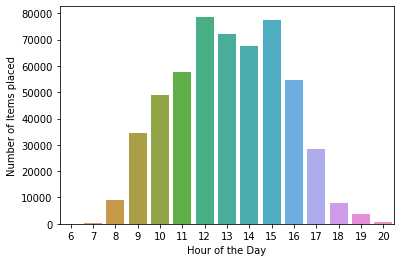

In [96]:
data = pd.DatetimeIndex(df.InvoiceDate).hour.value_counts()
fig, ax = plt.subplots()
sns.barplot(y = data, x = data.keys(), ax = ax)
ax.set_xlabel ("Hour of the Day")
ax.set_ylabel ("Number of Items placed")
plt.show()

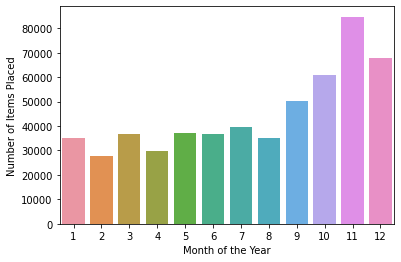

In [97]:
data = pd.DatetimeIndex(df.InvoiceDate).month.value_counts()
fig, ax = plt.subplots()
sns.barplot(y = data, x = data.keys(), ax = ax)
ax.set_xlabel ("Month of the Year")
ax.set_ylabel ("Number of Items Placed")
plt.show()

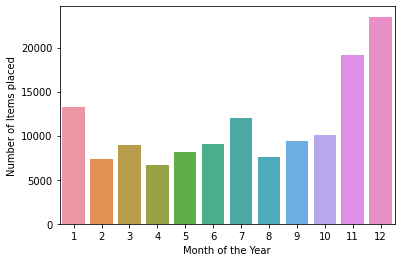

In [98]:
temp = df[df.CustomerID.isna()]
data = pd.DatetimeIndex(temp.InvoiceDate).month.value_counts()
fig, ax = plt.subplots()
sns.barplot(y = data, x = data.keys(), ax = ax)
ax.set_xlabel ("Month of the Year")
ax.set_ylabel ("Number of Items placed")
plt.show()

In [38]:
t = df.StockCode.value_counts().rename_axis('Items').reset_index(name='counts')
t['cumpct'] = t['counts'].cumsum() / t['counts'].sum()
t


,Items,counts,cumpct
0,85123A,2313,0.004268
1,22423,2203,0.008334
2,85099B,2159,0.012318
3,47566,1727,0.015504
4,20725,1639,0.018529
...,...,...,...
4065,51014c,1,0.999993
4066,84546,1,0.999994
4067,84206B,1,0.999996
4068,21589,1,0.999998


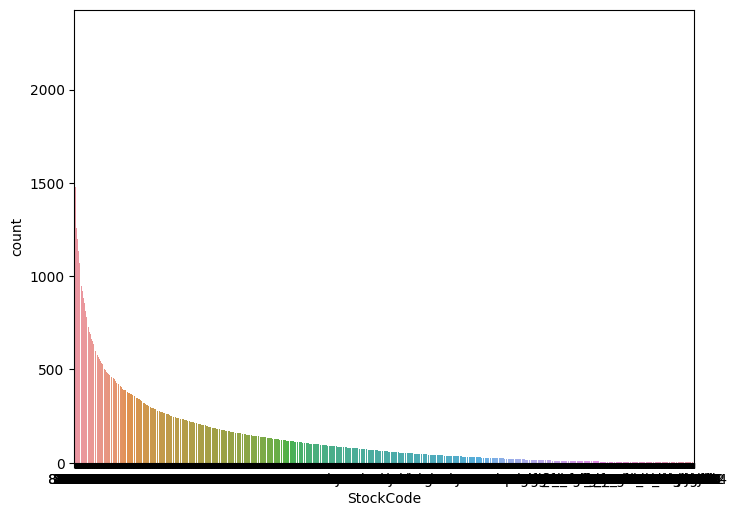

In [39]:
fig = plt.figure(figsize=(8,6), dpi=100)
c = df.StockCode.value_counts()
sns.countplot(data=df, x='StockCode', order=c.index)
plt.show()

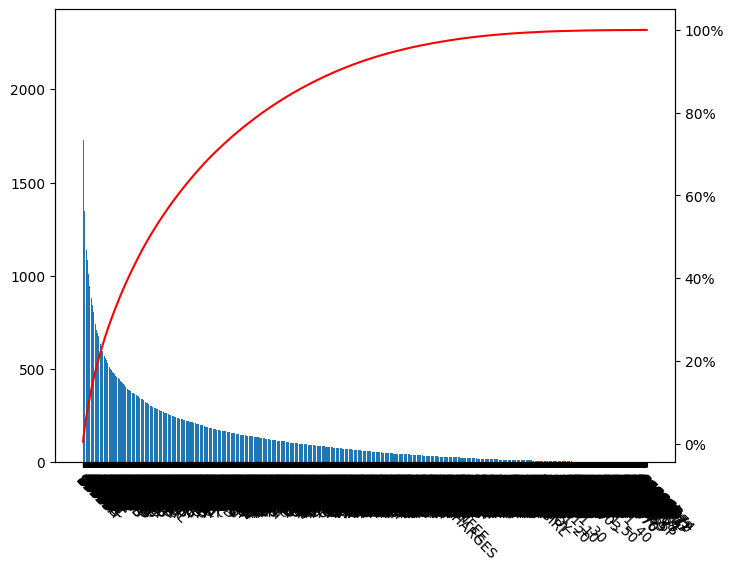

In [40]:
fig = plt.figure(figsize=(8,6), dpi=100)
ax = fig.add_subplot()

ax.bar(range(len(t)), t['counts'])
ax.set_xticks(range(len(t)))
ax.set_xticklabels(labels=list(t['Items']), ha='left', rotation=-45, rotation_mode='anchor')

# Plot cumulative distribution on secondary axis
ax2 = ax.twinx()
ax2.plot(range(len(t)), t['cumpct'], c='#ff0000')
ax2.ticklabel_format(axis='y')
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0f}%'.format(x*100) for x in vals])
plt.show()

In [41]:
temp.Description.count()

135080

In [42]:
df.CustomerID.value_counts()

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
13391       1
16579       1
13366       1
17763       1
17846       1
Name: CustomerID, Length: 4372, dtype: int64

In [43]:
max_cust_id = df.CustomerID.max()
max_cust_id

18287

In [44]:
data_replace = df.copy(True)
data = df.copy(True)

In [45]:
temp = df[df.CustomerID.isna()]
arr = temp.InvoiceNo.unique()
count = 1
for num in arr:
  data_replace.loc[df.InvoiceNo == num, 'CustomerID'] = max_cust_id + count
  count +=1

In [46]:
data_replace.CustomerID.max()

21997

In [47]:
data_replace.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

In [48]:
data = data.dropna()
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

In [117]:
d = source_df[pd.DatetimeIndex(source_df.InvoiceDate).month == 11]
d =d.drop_duplicates(subset=['InvoiceNo']).InvoiceDate
pd.DatetimeIndex(d).day.value_counts()

10    184
22    174
17    170
30    164
18    164
16    161
23    154
14    152
29    151
24    146
8     144
4     143
15    142
9     127
28    126
3     124
21    122
11    118
2     116
7     115
1     105
20    105
6     104
25     98
13     93
27     60
Name: InvoiceDate, dtype: int64

**Exploratory Analysis and Data Cleaning steps performed:**
1. Quantities and Unit Prices attribute are dropped
2. Description attribute had leading and trailing white spaces. These were removed. Infact all leading and trailing white spaces have been removed
3. Invoice Number has 3836 cancelled transactions. I have kept these, because it would still give us an idea of what the customer wanted to buy. Transactions could have been cancelled for a variery of reasons.
4. StockId has some records like Postage, Bank Charges, Manual, Discount which dont really help our analysis. I have kept them as such as their numbers are small compared to our data set
5. NaN in Description attribute has been updated with "Description missing"
6. I observed that majority of the transactions happen in the afternoon and we had many transcations in the month of November and December as shown below:

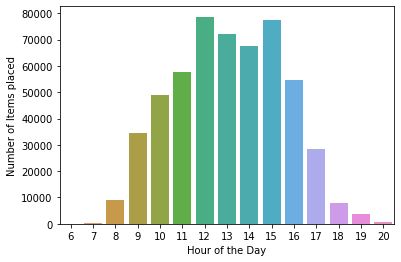
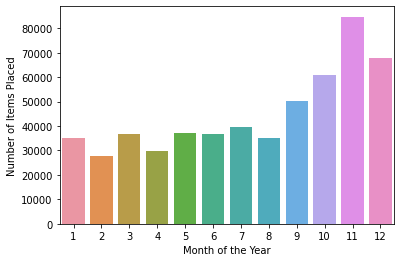



7. There were missing values in the CustomerId field accounting to nearly 25% of the records. So I tried two approaches to solve this:
  1. drop all the missing CustomerId field. I felt this might not be efficient as there were 135080 missing IDs out of 541909 IDs
  2. Since the records are in the asceding order by time, we can group the records by the InvoiceNo and assign the same customerID to all records with the same InvoiceNo. I chose max(available CustomerID) as the starting point while inserting missing CustomerId. This ofcourse does not handle the fact that we can have returning customers.  
8. Data type of CustomerId attribute has been changed to int and the numeric values in the invoice number and stockcode were convereted to string for ease of computation.
9. Majority of the customers are from the UK followed by Germany and France.
10. The most purchased item in the list is WHITE HANGING HEART T-LIGHT HOLDER followed by REGENCY CAKESTAND 3 TIER and JUMBO BAG RED RETROSPOT
11. Preponderance on the description of the items tells us that the most purchased items are the home-decor and party items. And since we have lots of transactions around the Christmas time, people would have purchased items for the festival
12. The reason for the most purchases in the month of November can be attributed to the Black Friday event which sees huge discounts on variety of items and hence many transcations during that time

### Requirement 5
1. There are 4070 different stockcodes in the dataset. Out of these around 2787 stockcodes correspond to Postage, Bank Charges, Manual, Discount which dont really count as examples. There are 4212 unique types of Description available. We would expect the stockcodes and description to match but I see that simlar items with different descriptions have been given the same item code. For eg. the most purchased product WHITE HANGING HEART T-LIGHT HOLDER also has a CREAM color variant which has been given the same item code
2. There are many CustomerIDs missing. Before preprocessing we had 4372 different customers. After preprocessing by creating new customerids I have 8082 different customers.
3. Number of cancelled orders are 3836 out of 25900 orders. So I have not removed them as they might give us a feel of what the customer might be looking at. 
4. 

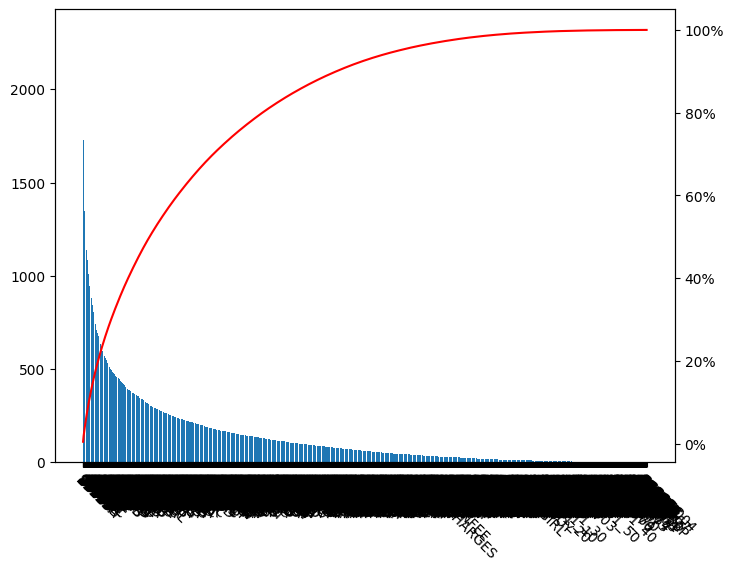

The pareto histogram above plots the number of times a product has been purchased. The top 30% of the products make up for nearly 80% of the transactions. This suggests that most the customers are purchasing from a select list of items. The curve has a steep rise and then saturates after nearly 50% of the most purchased products. 

In [49]:
def make_list(s):
    assert type(s) is pd.Series, 'Must pass a Pandas Series'
    return list(set(s))

**We now look at the results obtained by dropping the missing customer id preprocessing step.**

In [50]:
data.groupby(['CustomerID'])['StockCode'].agg(make_list)

CustomerID
12346                                              [23166]
12347    [23162, 85178, 22697, 21976, 22550, 84625C, 22...
12348    [21985, 23077, POST, 21213, 22437, 21725, 2261...
12349    [22692, 23283, POST, 84078A, 85014B, 22553, 23...
12350    [22348, 21832, 21915, 22412, 79191C, 21171, 22...
                               ...                        
18280    [22358, 22495, 22499, 82484, 22467, 22084, 226...
18281    [23007, 22028, 22467, 23209, 23008, 22716, 22037]
18282    [23174, 23175, 22424, 22818, 21109, 22089, 224...
18283    [22661, 21985, 22731, 22587, 21121, 23378, 229...
18287    [23223, 23077, 47422, 23267, 21819, 22582, 233...
Name: StockCode, Length: 4372, dtype: object

In [51]:
X = data.groupby(['CustomerID'])['StockCode'].agg(make_list).values.tolist()

In [52]:
te = TransactionEncoder()
orders_ary = te.fit_transform(X)
orders_ary.shape

(4372, 3684)

In [53]:
Dinst = pd.DataFrame(orders_ary, columns=te.columns_)
Dinst

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,...,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4368,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [54]:
frequent_itemsets = fpgrowth(Dinst, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.202882,(22423)
1,0.102928,(23084)
2,0.097667,(22699)
3,0.094922,(84991)
4,0.089433,(22727)
...,...,...
359,0.064730,"(82482, 82494L)"
360,0.070677,"(22470, 22469)"
361,0.060842,"(22470, 85123A)"
362,0.057640,"(22578, 22577)"


In [55]:
minconf = 0.8
rules = association_rules(frequent_itemsets, min_threshold=minconf, metric= 'confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22697),(22699),0.089204,0.097667,0.074108,0.830769,8.506143,0.065396,5.331968
1,"(22423, 22697)",(22699),0.068618,0.097667,0.059927,0.873333,8.941952,0.053225,7.123682
2,"(22697, 22699)",(22423),0.074108,0.202882,0.059927,0.808642,3.985775,0.044892,4.165585
3,"(22423, 22699)",(22697),0.074108,0.089204,0.059927,0.808642,9.065084,0.053316,4.759643
4,(22726),(22727),0.073879,0.089433,0.060613,0.820433,9.173747,0.054006,5.070918
5,(22698),(22697),0.073422,0.089204,0.068161,0.928349,10.407029,0.061612,12.711544
6,(22698),(22699),0.073422,0.097667,0.062443,0.850467,8.707829,0.055272,6.034352
7,(22698),(22423),0.073422,0.202882,0.059698,0.813084,4.007671,0.044802,4.264581
8,"(22698, 22697)",(22699),0.068161,0.097667,0.060156,0.882550,9.036323,0.053498,7.682721
9,"(22698, 22699)",(22697),0.062443,0.089204,0.060156,0.963370,10.799624,0.054585,24.864730


### Requirement 6 

* For the case of dropped NAs I have 4372 market baskets and 3684 items


### Requirement 7 

* For the case of dropped NAs I have 364 frequent itemsets 


### Requirement 8 

* For the case of dropped NAs I have 27 interesting rules for minconf=0.8

### Requirement 9

In [56]:
cols = ['antecedents', 'consequents']

In [57]:
r1 = rules.sort_values(by=['confidence'], ascending = False)[0:5]
r1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,"(22698, 22423, 22699)",(22697),0.053522,0.089204,0.051693,0.965812,10.827000,0.046918,26.640782
9,"(22698, 22699)",(22697),0.062443,0.089204,0.060156,0.963370,10.799624,0.054585,24.864730
13,"(22698, 22423)",(22697),0.059698,0.089204,0.056496,0.946360,10.608940,0.051171,16.979839
5,(22698),(22697),0.073422,0.089204,0.068161,0.928349,10.407029,0.061612,12.711544
17,"(22698, 22697, 22423)",(22699),0.056496,0.097667,0.051693,0.914980,9.368364,0.046175,10.613155


Confidence gives us a measure of how likely the consequent would be purchased given the antecedent is puchased.

|#|Confidence|
|-:|:-|
1|	(Roses Regency T&S, Regency Cake Stand, Pink Regency T&S) -> (Green Regency T&S)|
2|	(Roses Regency T&S, Pink Regency T&S)	-> (Green Regency T&S)|
3|	(Pink Regency T&S, Regency Cake Stand) ->	(Green Regency T&S)|
4|	(Pink Regency T&S) ->	(Green Regency T&S)|
5|	(Pink Regency T&S, Regency Cake Stand, Green Regency T&S) ->	(Roses Regency T&S)|

This measure tells us that if people have purchased roses, pink teacup and cake stand, then they are likely to purchase the gree tea cups

In [58]:
rules = association_rules(frequent_itemsets, min_threshold=0., metric= 'lift')
r2 = rules.sort_values(by=['lift'], ascending = False)[0:5]
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47,"(22697, 22423)","(22698, 22699)",0.068618,0.062443,0.051693,0.753333,12.064371,0.047408,3.800907
46,"(22698, 22699)","(22697, 22423)",0.062443,0.068618,0.051693,0.827839,12.064371,0.047408,5.409939
50,(22698),"(22697, 22423, 22699)",0.073422,0.059927,0.051693,0.704050,11.748496,0.047293,3.176458
43,"(22697, 22423, 22699)",(22698),0.059927,0.073422,0.051693,0.862595,11.748496,0.047293,6.743430
44,"(22698, 22423)","(22697, 22699)",0.059698,0.074108,0.051693,0.865900,11.684310,0.047268,6.904509


Lift measure tells us that the roses, pink, green tea and saucers and the cake stand are likely to be purchased together always. Some of these rules are similar to the ones that we got from confidence. But the most intersting rule by lift is not the same as the most interesting rule by confidence. The lift measure tells us that if the customer has some of the items from roses, pink, green tea and saucers and the cake stand there are likely to buy all those items they do not have from this set.

In [59]:
rules = association_rules(frequent_itemsets, min_threshold=0., metric= 'leverage')
r3 = rules.sort_values(by=['leverage'], ascending = False)[0:5]
r3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(22697),(22699),0.089204,0.097667,0.074108,0.830769,8.506143,0.065396,5.331968
5,(22699),(22697),0.097667,0.089204,0.074108,0.758782,8.506143,0.065396,3.775824
17,(22697),(22698),0.089204,0.073422,0.068161,0.764103,10.407029,0.061612,3.927886
16,(22698),(22697),0.073422,0.089204,0.068161,0.928349,10.407029,0.061612,12.711544
229,(22910),(22086),0.107502,0.140668,0.074794,0.695745,4.946009,0.059672,2.824378


Leverage gives the correlation measure between two items. Here the leverage is close to zero which might suggest independence from each other. But since they are postive there is slight postive correlation. The most intersting rule here is the postive correlation between green teacup and roses tea cup. We also have new items vintage and 50's Christmas paper kits correlated which is a new rule addition

In [60]:
rules = association_rules(frequent_itemsets, min_threshold=0., metric= 'conviction')
r4=rules.sort_values(by=['conviction'], ascending = False)[0:5]
r4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,"(22698, 22423, 22699)",(22697),0.053522,0.089204,0.051693,0.965812,10.827000,0.046918,26.640782
23,"(22698, 22699)",(22697),0.062443,0.089204,0.060156,0.963370,10.799624,0.054585,24.864730
29,"(22698, 22423)",(22697),0.059698,0.089204,0.056496,0.946360,10.608940,0.051171,16.979839
16,(22698),(22697),0.073422,0.089204,0.068161,0.928349,10.407029,0.061612,12.711544
40,"(22698, 22697, 22423)",(22699),0.056496,0.097667,0.051693,0.914980,9.368364,0.046175,10.613155


Conviction metric gives a measure of what factor the rule would be incorrect if the antecedeant and consequent were independent. This table is exactly similar to that of confidence.

To summarize, the confidence, lift and conviction are good measures to get intersting rules. It would be natural to think that people would prefer to get all the sets of green, roses and pink teacups and hence we see those rules. The regency cake stand was also an item that was most interesting in the most intersting rule. I assume that since we are looking at data from  online store, its likely that there were huge discounts on Regency products during Christmas and hence people have purchased them together. The leverage metric suggested that these items were not correlated so it might not be that good a metric to use here. Both the confidence and conviction measures tell us that the green tea cup was a prominent consequent in the rules.

In [61]:
item_list = [22423, 22697, 22698, 22699, 22910, 22086]
for item in item_list:
  temp = source_df[source_df.StockCode == item]
  print("item: {} description: {}".format(item,temp.Description.iloc[0]))

item: 22423 description: REGENCY CAKESTAND 3 TIER
item: 22697 description: GREEN REGENCY TEACUP AND SAUCER
item: 22698 description: PINK REGENCY TEACUP AND SAUCER
item: 22699 description: ROSES REGENCY TEACUP AND SAUCER 
item: 22910 description: PAPER CHAIN KIT VINTAGE CHRISTMAS
item: 22086 description: PAPER CHAIN KIT 50'S CHRISTMAS 


In [62]:
item_list = [22697, 22698, 22699, 22910, 22423, 22086]
cols = ['StockCode', 'Description', 'InvoiceDate']
new_df = pd.DataFrame(columns=cols)
for item in item_list:
  temp = source_df[source_df.StockCode == item][cols]
  new_df = new_df.append(temp)
  
  

**We now look at the results obtained by imputing the customer id.**

In [83]:
data_replace.groupby(['CustomerID'])['StockCode'].agg(make_list)

CustomerID
12346                                              [23166]
12347    [23162, 85178, 22697, 21976, 22550, 84625C, 22...
12348    [21985, 23077, POST, 21213, 22437, 21725, 2261...
12349    [22692, 23283, POST, 84078A, 85014B, 22553, 23...
12350    [22348, 21832, 21915, 22412, 79191C, 21171, 22...
                               ...                        
21993                                     [72351A, 72801D]
21994    [21080, 21985, 23378, 23291, 22357, 21213, 231...
21995    [23378, 22357, 21213, 23196, 84378, 23166, 225...
21996    [20727, 21668, 22197, 22730, 84029G, 84997c, 2...
21997    [22684, 20669, 21125, 22697, 22910, 22357, DOT...
Name: StockCode, Length: 8082, dtype: object

In [84]:
X = data_replace.groupby(['CustomerID'])['StockCode'].agg(make_list).values.tolist()

In [85]:
te = TransactionEncoder()
orders_ary = te.fit_transform(X)
orders_ary.shape

(8082, 4070)

In [86]:
Dinst = pd.DataFrame(orders_ary, columns=te.columns_)
Dinst

,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15056bl,15056n,15056p,15058A,15058B,15058C,15060B,15060b,16008,16010,16011,16012,16014,16015,16016,16020C,16033,...,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,AMAZONFEE,B,BANK CHARGES,C2,CRUK,D,DCGS0003,DCGS0004,DCGS0055,DCGS0057,DCGS0066P,DCGS0067,DCGS0068,DCGS0069,DCGS0070,DCGS0071,DCGS0072,DCGS0073,DCGS0074,DCGS0076,DCGSSBOY,DCGSSGIRL,DOT,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,Fals

In [87]:
frequent_itemsets = fpgrowth(Dinst, min_support=0.04, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.145385,(22423)
1,0.088344,(22697)
2,0.087973,(22699)
3,0.081539,(23084)
4,0.073497,(21731)
...,...,...
357,0.048874,"(22470, 22469)"
358,0.059515,"(85099B, DOT)"
359,0.048750,"(21931, DOT)"
360,0.044420,"(22411, DOT)"


In [88]:
minconf = 0.7
rules = association_rules(frequent_itemsets, min_threshold=minconf, metric= 'confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22697),(22699),0.088344,0.087973,0.068176,0.771709,8.772081,0.060404,3.995013
1,(22699),(22697),0.087973,0.088344,0.068176,0.774965,8.772081,0.060404,4.051169
2,"(22697, 22423)",(22699),0.053823,0.087973,0.044296,0.822989,9.354983,0.039561,5.152359
3,"(22423, 22699)",(22697),0.053081,0.088344,0.044296,0.834499,9.445966,0.039607,5.508454
4,(20719),(20724),0.067063,0.077951,0.047018,0.701107,8.994201,0.041790,3.084880
5,(22698),(22697),0.065825,0.088344,0.058278,0.885338,10.021435,0.052462,7.950832
6,(22698),(22699),0.065825,0.087973,0.053947,0.819549,9.315885,0.048156,5.054148
7,"(22698, 22697)",(22699),0.058278,0.087973,0.051349,0.881104,10.015588,0.046222,7.670796
8,"(22698, 22699)",(22697),0.053947,0.088344,0.051349,0.951835,10.774131,0.046583,18.927705
9,"(22697, 22699)",(22698),0.068176,0.065825,0.051349,0.753176,11.442047,0.046861,3.784781


### Requirement 6 

* For the case of replaced NAs I have 8082 market baskets and 4070 items

### Requirement 7 

* For the case of replaced NAs I have 161 frequent itemsets for minsup of 0.05 and 362 for minsup of 0.04

### Requirement 8 

* For the case of replaced NAs I have 8 interesting rules for minconf=0.8 and 32 rules for minconf = 0.7 both generated from minsup=0.04 

In [89]:
rules = association_rules(frequent_itemsets, min_threshold=0., metric= 'confidence')
rules.sort_values(by=['confidence'], ascending = False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(22698, 22699)",(22697),0.053947,0.088344,0.051349,0.951835,10.774131,0.046583,18.927705
18,(22698),(22697),0.065825,0.088344,0.058278,0.885338,10.021435,0.052462,7.950832
24,"(22698, 22697)",(22699),0.058278,0.087973,0.051349,0.881104,10.015588,0.046222,7.670796
202,"(22411, 22386)",(85099B),0.046894,0.139569,0.040337,0.860158,6.162943,0.033792,6.152890
194,"(21931, 22386)",(85099B),0.049864,0.139569,0.042440,0.851117,6.098160,0.035481,5.779225


In [90]:
rules = association_rules(frequent_itemsets, min_threshold=0., metric= 'lift')
rules.sort_values(by=['lift'], ascending = False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(22698),"(22697, 22699)",0.065825,0.068176,0.051349,0.780075,11.442047,0.046861,4.237011
26,"(22697, 22699)",(22698),0.068176,0.065825,0.051349,0.753176,11.442047,0.046861,3.784781
25,"(22698, 22699)",(22697),0.053947,0.088344,0.051349,0.951835,10.774131,0.046583,18.927705
28,(22697),"(22698, 22699)",0.088344,0.053947,0.051349,0.581232,10.774131,0.046583,2.259136
224,(23301),(23300),0.069537,0.058649,0.043182,0.620996,10.588382,0.039104,2.483753


In [91]:
rules = association_rules(frequent_itemsets, min_threshold=0., metric= 'leverage')
rules.sort_values(by=['leverage'], ascending = False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(22697),(22699),0.088344,0.087973,0.068176,0.771709,8.772081,0.060404,3.995013
3,(22699),(22697),0.087973,0.088344,0.068176,0.774965,8.772081,0.060404,4.051169
188,(22386),(85099B),0.088963,0.139569,0.069785,0.784423,5.620306,0.057368,3.991288
189,(85099B),(22386),0.139569,0.088963,0.069785,0.500000,5.620306,0.057368,1.822074
18,(22698),(22697),0.065825,0.088344,0.058278,0.885338,10.021435,0.052462,7.950832


In [92]:
rules = association_rules(frequent_itemsets, min_threshold=0., metric= 'conviction')
rules.sort_values(by=['conviction'], ascending = False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(22698, 22699)",(22697),0.053947,0.088344,0.051349,0.951835,10.774131,0.046583,18.927705
18,(22698),(22697),0.065825,0.088344,0.058278,0.885338,10.021435,0.052462,7.950832
24,"(22698, 22697)",(22699),0.058278,0.087973,0.051349,0.881104,10.015588,0.046222,7.670796
202,"(22411, 22386)",(85099B),0.046894,0.139569,0.040337,0.860158,6.162943,0.033792,6.152890
194,"(21931, 22386)",(85099B),0.049864,0.139569,0.042440,0.851117,6.098160,0.035481,5.779225


In [95]:
item_list = [22697, 22698, 22699, 22386, 22411, 21931, '85099B', 23301, 23300]
for item in item_list:
  temp = source_df[source_df.StockCode == item]
  print("item: {} description: {}".format(item,temp.Description.iloc[0]))

item: 22697 description: GREEN REGENCY TEACUP AND SAUCER
item: 22698 description: PINK REGENCY TEACUP AND SAUCER
item: 22699 description: ROSES REGENCY TEACUP AND SAUCER 
item: 22386 description: JUMBO BAG PINK POLKADOT
item: 22411 description: JUMBO SHOPPER VINTAGE RED PAISLEY
item: 21931 description: JUMBO STORAGE BAG SUKI
item: 85099B description: JUMBO BAG RED RETROSPOT
item: 23301 description: GARDENERS KNEELING PAD KEEP CALM 
item: 23300 description: GARDENERS KNEELING PAD CUP OF TEA 


In [94]:
item_list = [22697, 22698, 22699, 22386, '85099B']
cols = ['StockCode', 'Description', 'InvoiceDate']
new_df = pd.DataFrame(columns=cols)
for item in item_list:
  temp = source_df[source_df.StockCode == item][cols]
  new_df = new_df.append(temp)
  
  

I had to change minsuo to 0.04 to get more rules in this case. These results are slightly different from those obtained earlier. The confidence measure has introduced new items here. Interestingly, the cake stand which was one of the item in the most interesting rule by confidence is missing here. Customers still prefer to buy green tea cups when they have the pink and roses tea cups. People are also likely to buy red bag retrospot if they have purchased pink bag and red paisley.

The lift measure now tells us that people who have one or two of the three types of teacups will buy the other types. But it has also introduced a new rule between gardenr's kneeling pad keep calm and cup of tea

The leverage measure still gives close to zero correlation between the rules.

The conviction measure gives the same result as that of confidence.

So for minsup of 0.04, some of the interesting rules generated were similar to that of results from dropping NAs. The consequent of green tea cup is still prominent but not all combinations of roses, green and pink tea cups are the interesting rules anymore. By increasing the minsup to 0.05, I got very less number of rules but they did not introduce new items and they had all combinations of green, roses and pink teacups as interesting rules. 
